In [18]:
!pip install kaggle

In [19]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [20]:
]!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [21]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!ls

data  dataset.zip  drive  sample_data


**Importing the Dependencies**

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [25]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3193.jpg', 'with_mask_225.jpg', 'with_mask_2852.jpg', 'with_mask_3651.jpg', 'with_mask_506.jpg']
['with_mask_2650.jpg', 'with_mask_1650.jpg', 'with_mask_3012.jpg', 'with_mask_2277.jpg', 'with_mask_2788.jpg']


In [26]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1766.jpg', 'without_mask_1081.jpg', 'without_mask_1189.jpg', 'without_mask_3320.jpg', 'without_mask_1437.jpg']
['without_mask_1233.jpg', 'without_mask_673.jpg', 'without_mask_1174.jpg', 'without_mask_513.jpg', 'without_mask_15.jpg']


In [27]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [28]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [29]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [30]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [31]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

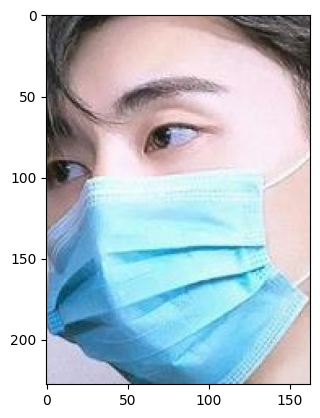

In [32]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

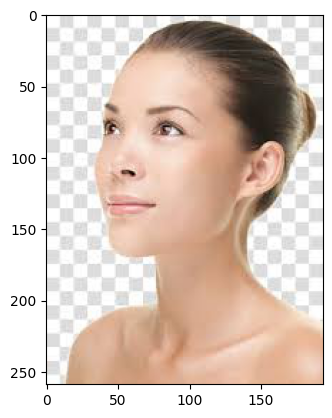

In [33]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [34]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [35]:
type(data)

list

In [36]:
len(data)

7553

In [37]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(128, 128, 3)

In [40]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [41]:
type(X)

numpy.ndarray

In [42]:
type(Y)

numpy.ndarray

In [43]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [44]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [47]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [48]:
X_train[0]

array([[[ 84,  63,  60],
        [ 85,  64,  60],
        [ 88,  66,  61],
        ...,
        [ 68,  57,  55],
        [ 71,  59,  57],
        [ 70,  54,  54]],

       [[ 87,  66,  63],
        [ 89,  66,  64],
        [ 91,  66,  64],
        ...,
        [ 63,  49,  48],
        [ 68,  53,  53],
        [ 70,  54,  54]],

       [[ 92,  68,  66],
        [ 91,  66,  65],
        [ 89,  65,  63],
        ...,
        [ 65,  49,  48],
        [ 66,  50,  50],
        [ 65,  49,  49]],

       ...,

       [[ 79,  80,  84],
        [ 69,  70,  73],
        [ 69,  69,  70],
        ...,
        [211, 179, 166],
        [206, 174, 160],
        [199, 167, 152]],

       [[ 76,  77,  79],
        [ 74,  75,  75],
        [ 75,  75,  75],
        ...,
        [211, 176, 165],
        [208, 175, 162],
        [204, 172, 157]],

       [[ 79,  79,  81],
        [ 82,  82,  83],
        [ 85,  86,  85],
        ...,
        [211, 177, 166],
        [210, 177, 164],
        [209, 177, 162]]

In [49]:
X_train_scaled[0]

array([[[0.32941176, 0.24705882, 0.23529412],
        [0.33333333, 0.25098039, 0.23529412],
        [0.34509804, 0.25882353, 0.23921569],
        ...,
        [0.26666667, 0.22352941, 0.21568627],
        [0.27843137, 0.23137255, 0.22352941],
        [0.2745098 , 0.21176471, 0.21176471]],

       [[0.34117647, 0.25882353, 0.24705882],
        [0.34901961, 0.25882353, 0.25098039],
        [0.35686275, 0.25882353, 0.25098039],
        ...,
        [0.24705882, 0.19215686, 0.18823529],
        [0.26666667, 0.20784314, 0.20784314],
        [0.2745098 , 0.21176471, 0.21176471]],

       [[0.36078431, 0.26666667, 0.25882353],
        [0.35686275, 0.25882353, 0.25490196],
        [0.34901961, 0.25490196, 0.24705882],
        ...,
        [0.25490196, 0.19215686, 0.18823529],
        [0.25882353, 0.19607843, 0.19607843],
        [0.25490196, 0.19215686, 0.19215686]],

       ...,

       [[0.30980392, 0.31372549, 0.32941176],
        [0.27058824, 0.2745098 , 0.28627451],
        [0.27058824, 0

**Building a Convolutional Neural Networks (CNN)**

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [52]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [53]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 21ms/step - loss: 0.4428 - acc: 0.8072 - val_loss: 0.2749 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2805 - acc: 0.8874 - val_loss: 0.2628 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2342 - acc: 0.9117 - val_loss: 0.2210 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1985 - acc: 0.9239 - val_loss: 0.2178 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1562 - acc: 0.9386 - val_loss: 0.2188 - val_acc: 0.9223


**Model Evaluation**

In [54]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2567 - acc: 0.8981
Test Accuracy = 0.8980807662010193


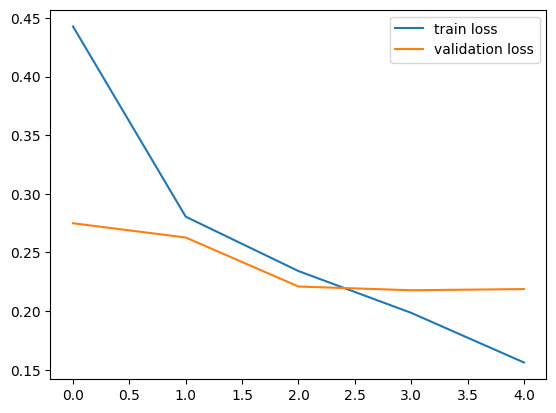

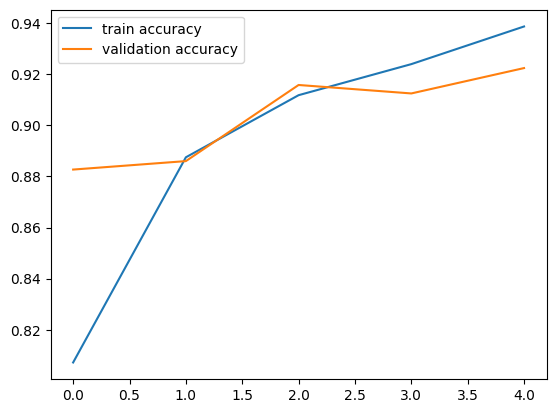

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/x.jpg


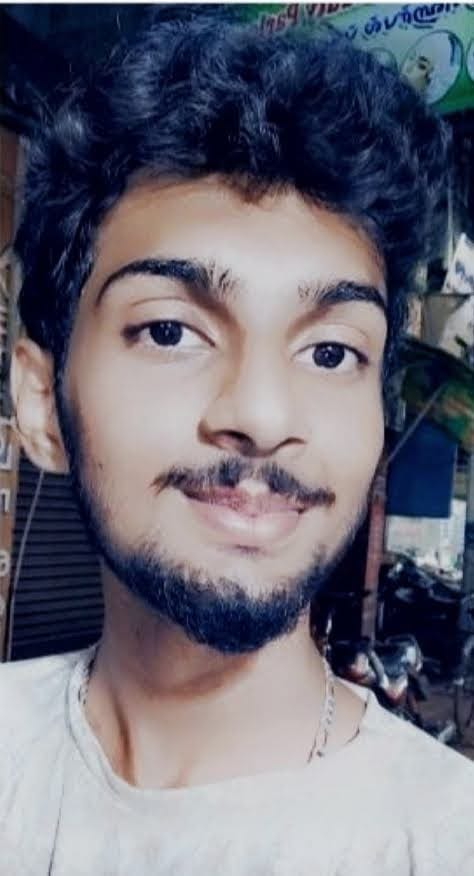

1/1 [==============================] - 0s 31ms/step
[[0.38660637 0.52492225]]
1
The person in the image is not wearing a mask


In [66]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')